**Exercice 1:**

Le critère de coût:  $\phi_{Mm}(X) = \min_{x_i \in X} \min_{x_k \in X, k \neq i} \lVert x_k - x_i \rVert$


Etapes de la méthodes:

*Initialisation un plan d'expérience X  de taille N dans un espace D de dimension d ( choisi d'une manière aléatoire dans les limites du domaine choisi)

*Calcul le critère de maximin $\{\phi_{Mm}(X)\}$ selon la formule cité.

*Initialisation de la température la température \(T\).

Répéter jusqu'à convergence :

- Génération d'un voisin X' du plan d'expérience actuel X. Deux méthodes sont choisi dans la suite, par une perturbation gaussienne et une perturbation aléatoire. On ajoute une échelle de perturbation pour pouvoir discuter la méthode d'exploration.
- Calcul le critère de maximin .
- Accepter le voisin \(X'\) avec une probabilité déterminée par la fonction d'acceptation en fonction de la température, par exemple :
    $\[
    P(\text{{accepter}}) = \exp\left(\frac{\phi_{Mm}(X) - \phi_{Mm}(X')}{T}\right)
    \]$
- Mise à jour le plan d'expérience actuel \(X\) si le voisin est accepté.
- Refroidissement selon le schéma choisi. On essaie dans la suite d'utiliser trois méthodes: un refroidissment linéaire, un refroidissement exponentiel et un refroidissment logarithmique pour pouvoir conclure la meilleure méthode.



[[0.12819667 0.64078502]
 [0.17335902 0.49546869]
 [0.4245021  0.74350704]
 [0.13320009 0.80705643]
 [0.1224263  0.38067225]
 [0.85142141 0.04025729]
 [0.4658617  0.45827971]
 [0.25226334 0.4374242 ]
 [0.84035912 0.7787381 ]
 [0.73016911 0.13271215]]


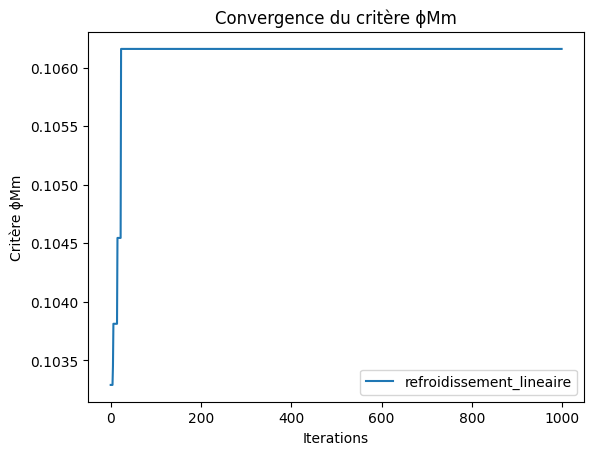

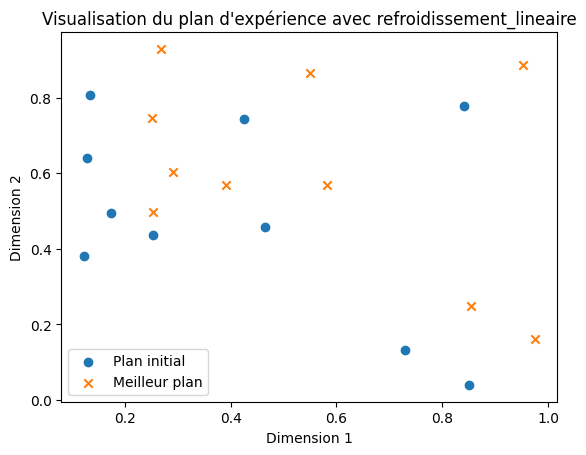

Meilleur plan d'expérience avec refroidissement_lineaire: [[0.25047    0.74626817]
 [0.29049273 0.6028871 ]
 [0.5494165  0.86596942]
 [0.26836292 0.92840915]
 [0.2533924  0.49823663]
 [0.97486039 0.16182994]
 [0.58262298 0.56933789]
 [0.39059174 0.56753206]
 [0.95299813 0.887122  ]
 [0.85357079 0.24824556]]
Meilleur critère ϕMm obtenu avec refroidissement_lineaire: 0.10615926867856317




<ipython-input-1-6ebc5200a347>:39: RuntimeWarning: overflow encountered in scalar divide
  return np.exp((nouveau_phi - phi_courant) / temperature)
<ipython-input-1-6ebc5200a347>:39: RuntimeWarning: divide by zero encountered in scalar divide
  return np.exp((nouveau_phi - phi_courant) / temperature)


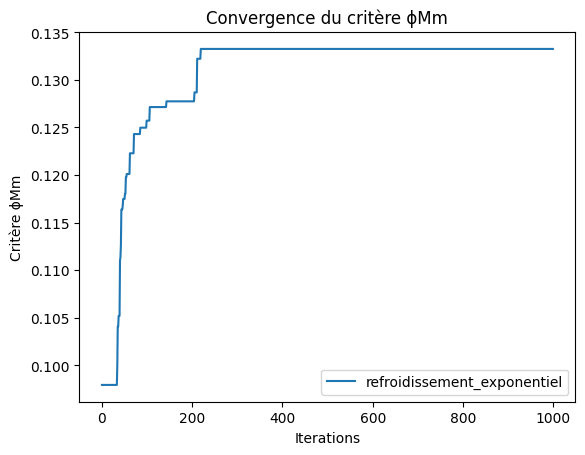

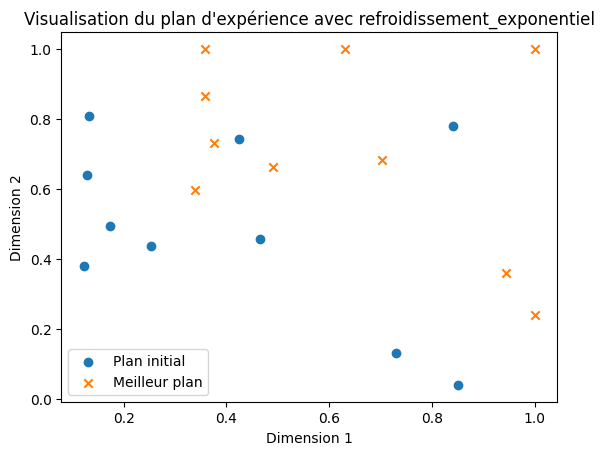

Meilleur plan d'expérience avec refroidissement_exponentiel: [[0.35913273 0.86630376]
 [0.3756812  0.73140261]
 [0.63132463 1.        ]
 [0.35739653 1.        ]
 [0.33935469 0.59817773]
 [1.         0.24010302]
 [0.702853   0.68194944]
 [0.49025608 0.66336258]
 [1.         1.        ]
 [0.94327269 0.36094056]]
Meilleur critère ϕMm obtenu avec refroidissement_exponentiel: 0.1332548302245464




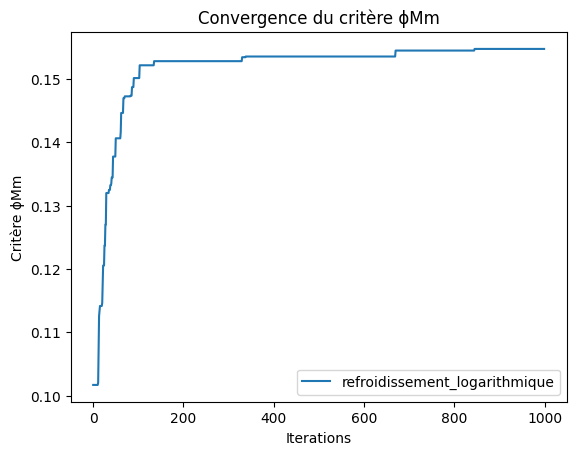

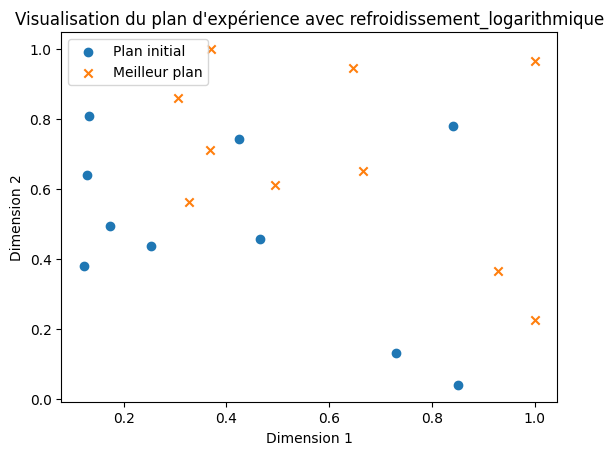

Meilleur plan d'expérience avec refroidissement_logarithmique: [[0.30548227 0.85896178]
 [0.36790367 0.71228758]
 [0.64660337 0.94533916]
 [0.3704301  1.        ]
 [0.3271007  0.56303899]
 [1.         0.22681111]
 [0.66565455 0.65006291]
 [0.49413323 0.61046014]
 [1.         0.96486813]
 [0.92877846 0.36626244]]
Meilleur critère ϕMm obtenu avec refroidissement_logarithmique: 0.1547256329428557




In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer le critère ϕMm
def calculer_critere(X):
    N = X.shape[0]
    phi = np.inf

    for i in range(N):
        for k in range(N):
            if k != i:
                distance = np.linalg.norm(X[k, :] - X[i, :])
                phi = min(phi, distance)

    return phi

# Fonction pour générer un voisin aléatoire avec une perturbation gaussienne
def generer_voisin_gaussien(plan_courant, limites_domaine, echelle_perturbation=0.1):
    voisin = plan_courant + echelle_perturbation * np.random.randn(*plan_courant.shape)
    for dim in range(voisin.shape[1]):
        voisin[:, dim] = np.where(voisin[:, dim] < limites_domaine[dim, 0], limites_domaine[dim, 0], voisin[:, dim])
        voisin[:, dim] = np.where(voisin[:, dim] > limites_domaine[dim, 1], limites_domaine[dim, 1], voisin[:, dim])

    return voisin

# Fonction pour générer un voisin aléatoire avec une perturbation aléatoire
def generer_voisin_gaussien(plan_courant, limites_domaine, echelle_perturbation=0.1):
    voisin = plan_courant + echelle_perturbation * np.random.rand(*plan_courant.shape)
    for dim in range(voisin.shape[1]):
        voisin[:, dim] = np.where(voisin[:, dim] < limites_domaine[dim, 0], limites_domaine[dim, 0], voisin[:, dim])
        voisin[:, dim] = np.where(voisin[:, dim] > limites_domaine[dim, 1], limites_domaine[dim, 1], voisin[:, dim])

    return voisin

# Fonction pour calculer la probabilité d'acceptation
def probabilite_acceptation(phi_courant, nouveau_phi, temperature):
    if nouveau_phi > phi_courant:
        return 1.0
    return np.exp((nouveau_phi - phi_courant) / temperature)

# Fonction pour le recuit simulé
def recuit_simule(plan_initial, max_iterations, temperature_initiale, strategie_refroidissement, limites_domaine, temperature_minimale=1e-5):
    plan_courant = plan_initial.copy()
    meilleur_plan = plan_courant.copy()
    phi_courant = calculer_critere(plan_courant)
    meilleur_phi = phi_courant
    temperature = temperature_initiale

    # Listes pour stocker les informations de convergence
    liste_iterations = []
    valeurs_phi = []

    for iteration in range(max_iterations):
        voisin = generer_voisin_gaussien(plan_courant, limites_domaine, echelle_perturbation=0.01)

        nouveau_phi = calculer_critere(voisin)

        if nouveau_phi > meilleur_phi:
            meilleur_plan = voisin.copy()
            meilleur_phi = nouveau_phi

        if probabilite_acceptation(phi_courant, nouveau_phi, temperature) > np.random.rand():
            plan_courant = voisin.copy()
            phi_courant = nouveau_phi

        # Stocker les informations de convergence
        liste_iterations.append(iteration)
        valeurs_phi.append(meilleur_phi)

        # Mise à jour de la température selon la stratégie de refroidissement
        temperature = strategie_refroidissement(temperature, iteration, temperature_minimale)

    # Tracer la convergence
    plt.plot(liste_iterations, valeurs_phi, label=f'{strategie_refroidissement.__name__}')
    plt.xlabel('Iterations')
    plt.ylabel('Critère ϕMm')
    plt.title('Convergence du critère ϕMm')
    plt.legend()
    plt.show()

    return meilleur_plan, meilleur_phi

# Différentes stratégies de refroidissement

def refroidissement_lineaire(temperature_initiale, iteration, temperature_minimale):
    return temperature_initiale - 0.001 * iteration
    #return max(temperature_initiale - 0.001 * iteration, temperature_minimale)

def refroidissement_exponentiel(temperature_initiale, iteration, temperature_minimale):
    return temperature_initiale * 0.95**iteration
    #return max(temperature_initiale * 0.95**iteration, temperature_minimale)

def refroidissement_logarithmique(temperature_initiale, iteration, temperature_minimale):
    return temperature_initiale / np.log(iteration + 2)
    #return max(temperature_initiale / np.log(iteration + 2), temperature_minimale)

# Exemple d'utilisation

plan_initial = np.random.rand(10, 2)
print(plan_initial)

strategies_refroidissement = [refroidissement_lineaire, refroidissement_exponentiel, refroidissement_logarithmique]

limites_domaine = np.array([[-1, 1], [-1, 1]])

for strategie in strategies_refroidissement:
    meilleur_plan, meilleur_phi = recuit_simule(plan_initial, max_iterations=1000, temperature_initiale=1.0,
                                                strategie_refroidissement=strategie, limites_domaine=limites_domaine,
                                                temperature_minimale=1e-5)

    # Visualisation du plan
    plt.scatter(plan_initial[:, 0], plan_initial[:, 1], label='Plan initial', marker='o')
    plt.scatter(meilleur_plan[:, 0], meilleur_plan[:, 1], label='Meilleur plan', marker='x')
    plt.legend()
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title(f'Visualisation du plan d\'expérience avec {strategie.__name__}')
    plt.show()

    print(f"Meilleur plan d'expérience avec {strategie.__name__}:", meilleur_plan)
    print(f"Meilleur critère ϕMm obtenu avec {strategie.__name__}:", meilleur_phi)
    print('\n')